# Data Understanding


Mendownload data, dari https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


unzip data

In [ ]:
import zipfile
zip = '/content/book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(zip, 'r')
zip_ref.extractall()
zip_ref.close()

Membaca file-file csv yang telah diunzip

In [ ]:
# loading dataset
import pandas as pd
book_dir = '/content/Books.csv'
user_dir = '/content/Users.csv'
rating_dir = '/content/Ratings.csv'
book_df = pd.read_csv(book_dir)
user_df = pd.read_csv(user_dir)
rating_df = pd.read_csv(rating_dir)

<ipython-input-52-197aef5e7adc>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv(book_dir)


# Exploratory Data Analysis

Overview data pada book_df

In [ ]:
book_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

Overview data pada user_df

In [ ]:
user_df.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

Overview data pada rating_df

In [ ]:
rating_df.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

Shape dari book_df, user_df, rating_df

In [ ]:
print(book_df.shape)
print(user_df.shape)
print(rating_df.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


mendrop data gambar pada book_df karena tidak diperlukan

In [ ]:
book_df = book_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

Mengubah nama-nama kolom dengan '-' supaya mudah dibaca pada python dan menghitung jumlah entri data unik

In [ ]:
book_df = book_df.rename(columns ={"Book-Title" : "Book_Title", "Book-Author" : "Book_Author", "Year-Of-Publication" : "Year"})
user_df = user_df.rename(columns ={"User-ID" : "User_ID"})
rating_df = rating_df.rename(columns ={"User-ID" : "User_ID","Book-Rating" : "Book_Rating"})

print('Jumlah entri unik data buku: ', len(book_df.ISBN.unique()))
print('Jumlah entri unik data user: ', len(user_df.User_ID.unique()))

Jumlah entri unik data buku:  271360
Jumlah entri unik data user:  278858


Overview jenis data pada book_df, terlihat bahwa ada data null pada kolom Book_Author dan Publisher

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Book_Title   271360 non-null  object
 2   Book_Author  271358 non-null  object
 3   Year         271360 non-null  object
 4   Publisher    271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


Mengubah format tahun publikasi ke angka, diperoleh beberapa sampel data pada kolom Year menjadi null

In [ ]:
book_df.Year = pd.to_numeric(book_df.Year, errors='coerce')
print('Tahun publikasi: ',sorted(book_df['Year'].unique()))
book_df.info()

Tahun publikasi:  [0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0, 2026.0, 2030.0, 2037.0, 2038.0, 2050.0, nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2

Jumlah ISBN, judul buku, penulis, tahun terbit, dan penerbit unik

In [ ]:
print('Jumlah ISBN: ', len(book_df.ISBN.unique()))
print('Jumlah Judul Buku: ', len(book_df.Book_Title.unique()))
print('Jumlah Penulis: ', len(book_df.Book_Author.unique()))
print('Jumlah Tahun Terbit: ', len(book_df.Year.unique()))
print('Jumlah Penerbit: ', len(book_df.Publisher.unique()))

Jumlah ISBN:  271360
Jumlah Judul Buku:  242135
Jumlah Penulis:  102023
Jumlah Tahun Terbit:  117
Jumlah Penerbit:  16808


Mendrop data kosong

In [ ]:
book_df = book_df.loc[(pd.isna(book_df[['Book_Title','Year','Publisher']])==False).all(axis=1)]
book_df.shape

(271355, 5)

Overview jenis data pada user_df, terdapat data user dengan kolom Age kosong

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Karena jumlah data kosong pada kolom Age signifikan, akan dimasukkan dengan nilai mean dari usia user

In [ ]:
user_df.Age = user_df.Age.fillna(user_df.Age.mean())

Overview jenis data pada rating_df, tidak ada data null

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User_ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book_Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Jumlah pengguna, buku, dan rating unik pada data rating

In [ ]:
print('Jumlah userID: ', len(rating_df.User_ID.unique()))
print('Jumlah ISBN: ', len(rating_df.ISBN.unique()))
print('Jumlah data rating: ', len(rating_df))

Jumlah userID:  105283
Jumlah ISBN:  340556
Jumlah data rating:  1149780


Nilai rating berada pada range 1-10 untuk penilaian eksplisit, atau 0 pada penilaian implisit

In [ ]:
rating_explicit = rating_df[rating_df['Book_Rating'] != 0]
rating_implicit = rating_df[rating_df['Book_Rating'] == 0]
print('Jumlah rating eksplisit: ',rating_explicit.shape)
print('Jumlah rating implisit: ',rating_implicit.shape)

Jumlah rating eksplisit:  (433671, 3)
Jumlah rating implisit:  (716109, 3)


Nilai statistika pada rating eksplisit

In [ ]:
rating_explicit.describe()

User_ID    Book_Rating
count  433671.000000  433671.000000
mean   135458.743451       7.601066
std     80678.385078       1.843798
min         8.000000       1.000000
25%     66619.000000       7.000000
50%    133184.000000       8.000000
75%    205735.000000       9.000000
max    278854.000000      10.000000

User yang memberikan rating eksplisit dan yang memberikan rating implisit

In [ ]:
user_explicit = user_df[user_df['User_ID'].isin(rating_explicit['User_ID'])]
user_implicit = user_df[user_df['User_ID'].isin(rating_implicit['User_ID'])]
print('Jumlah user rating eksplisit: ',user_explicit.shape)
print('Jumlah user rating implisit: ',user_implicit.shape)

Jumlah user rating eksplisit:  (77805, 3)
Jumlah user rating implisit:  (59517, 3)


Buku yang dirating eksplisit dan dirating implisit

In [ ]:
book_explicit = book_df[book_df['ISBN'].isin(rating_explicit['ISBN'])]
book_implicit = book_df[book_df['ISBN'].isin(rating_implicit['ISBN'])]
print('Jumlah rating buku eksplisit: ',book_explicit.shape)
print('Jumlah rating buku implisit: ',book_implicit.shape)

Jumlah rating buku eksplisit:  (149833, 5)
Jumlah rating buku implisit:  (201620, 5)


# Data Preprocessing

Penggabungan data user

In [ ]:
import numpy as np
user_all = np.concatenate((user_df.User_ID.unique(),rating_df.User_ID.unique()))
user_all = np.sort(np.unique(user_all))
print('Jumlah seluruh data user berdasarkan User_ID: ', len(user_all))

Jumlah seluruh data user berdasarkan User_ID:  278858


Penggabungan data buku

In [ ]:
book_all = np.concatenate((book_df.ISBN.unique(),rating_df.ISBN.unique()))
book_all = np.sort(np.unique(book_all))
print('Jumlah seluruh data buku berdasarkan ISBN: ', len(book_all))

Jumlah seluruh data buku berdasarkan ISBN:  341765


Jumlah rating pada data

In [ ]:
books = pd.merge(rating_df, book_df , on='ISBN', how='left')
books

User_ID         ISBN  Book_Rating  \
0         276725   034545104X            0   
1         276726   0155061224            5   
2         276727   0446520802            0   
3         276729   052165615X            3   
4         276729   0521795028            6   
...          ...          ...          ...   
1149775   276704   1563526298            9   
1149776   276706   0679447156            0   
1149777   276709   0515107662           10   
1149778   276721   0590442449           10   
1149779   276723  05162443314            8   

                                                Book_Title        Book_Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
1                                         Rites of Passage         Judith Rae   
2                                             The Notebook    Nicholas Sparks   
3                                           Help!: Level 1      Philip Prowse   
4        The Amsterdam Connection : Level 4 (Cambridge ...        Sue Leather   
...                                                    ...                ...   
1149775  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1149776  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1149777   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1149778                                  Fourth Grade Rats     Jerry Spinelli   
1149779                                                NaN                NaN   

           Year                   Publisher  
0        2002.0            Ballantine Books  
1        2001.0                      Heinle  
2        1996.0                Warner Books  
3        1999.0  Cambridge University Press  
4        2001.0  Cambridge University Press  
...         ...                         ...  
1149775  2000.0            Longstreet Press  
1149776  1997.0             Alfred A. Knopf  
1149777  1996.0                  Jove Books  
1149778  1996.0                  Scholastic  
1149779     NaN                         NaN  

[1149780 rows x 7 columns]

Mengecek data null pada rating buku

In [ ]:
books.isnull().sum()

User_ID             0
ISBN                0
Book_Rating         0
Book_Title     118650
Book_Author    118652
Year           118650
Publisher      118650
dtype: int64

Jumlah rating buku berdasarkan ISBN

In [ ]:
books.groupby('ISBN').sum()

User_ID  Book_Rating Book_Title Book_Author  Year Publisher
ISBN                                                                    
 0330299891   271009            6          0           0   0.0         0
 0375404120   356057            3          0           0   0.0         0
 0586045007    89192            0          0           0   0.0         0
 9022906116   100868            7          0           0   0.0         0
 9032803328    89192            0          0           0   0.0         0
...              ...          ...        ...         ...   ...       ...
cn113107      107301            0          0           0   0.0         0
ooo7156103    266146            7          0           0   0.0         0
§423350229     85250            0          0           0   0.0         0
´3499128624    86103            8          0           0   0.0         0
Ô½crosoft     187517            7          0           0   0.0         0

[340556 rows x 6 columns]

Menggabungkan dengan fitur Book_Title

In [ ]:
all_books_rate = rating_df
all_books_title = pd.merge(all_books_rate, book_explicit[['ISBN','Book_Title']], on='ISBN', how='left')
all_books_title

User_ID         ISBN  Book_Rating  \
0         276725   034545104X            0   
1         276726   0155061224            5   
2         276727   0446520802            0   
3         276729   052165615X            3   
4         276729   0521795028            6   
...          ...          ...          ...   
1149775   276704   1563526298            9   
1149776   276706   0679447156            0   
1149777   276709   0515107662           10   
1149778   276721   0590442449           10   
1149779   276723  05162443314            8   

                                                Book_Title  
0                                     Flesh Tones: A Novel  
1                                         Rites of Passage  
2                                             The Notebook  
3                                           Help!: Level 1  
4        The Amsterdam Connection : Level 4 (Cambridge ...  
...                                                    ...  
1149775  Get Clark Smart : The Ultimate Guide for the S...  
1149776  Eight Weeks to Optimum Health: A Proven Progra...  
1149777   The Sherbrooke Bride (Bride Trilogy (Paperback))  
1149778                                  Fourth Grade Rats  
1149779                                                NaN  

[1149780 rows x 4 columns]

Penggabungan data eksplisit atau untuk rating 1-10 saja

In [ ]:
user_exp = np.concatenate((user_explicit.User_ID.unique(),rating_explicit.User_ID.unique()))
user_exp = np.sort(np.unique(user_exp))
print('Jumlah data user eksplisit berdasarkan User_ID: ', len(user_exp))

book_exp = np.concatenate((book_explicit.ISBN.unique(),rating_explicit.ISBN.unique()))
book_exp = np.sort(np.unique(book_exp))
print('Jumlah data buku eksplisit berdasarkan ISBN: ', len(book_exp))

Jumlah data user eksplisit berdasarkan User_ID:  77805
Jumlah data buku eksplisit berdasarkan ISBN:  185973


Mengecek data null pada rating buku eksplisit

In [ ]:
books_exp = pd.merge(rating_explicit, book_explicit , on='ISBN', how='left')
books_exp.isnull().sum()

User_ID            0
ISBN               0
Book_Rating        0
Book_Title     49832
Book_Author    49834
Year           49832
Publisher      49832
dtype: int64

Menggabungkan dengan fitur Book_Title

In [ ]:
exp_books_rate = rating_explicit
exp_books_title = pd.merge(exp_books_rate, book_explicit[['ISBN','Book_Title']], on='ISBN', how='left')
exp_books_title

User_ID         ISBN  Book_Rating  \
0        276726   0155061224            5   
1        276729   052165615X            3   
2        276729   0521795028            6   
3        276736   3257224281            8   
4        276737   0600570967            6   
...         ...          ...          ...   
433666   276704   0806917695            5   
433667   276704   1563526298            9   
433668   276709   0515107662           10   
433669   276721   0590442449           10   
433670   276723  05162443314            8   

                                               Book_Title  
0                                        Rites of Passage  
1                                          Help!: Level 1  
2       The Amsterdam Connection : Level 4 (Cambridge ...  
3                                                     NaN  
4                                                     NaN  
...                                                   ...  
433666  Perplexing Lateral Thinking Puzzles: Scholasti...  
433667  Get Clark Smart : The Ultimate Guide for the S...  
433668   The Sherbrooke Bride (Bride Trilogy (Paperback))  
433669                                  Fourth Grade Rats  
433670                                                NaN  

[433671 rows x 4 columns]

# Data Preparation

Mengecek missing value pada all_books_title

In [ ]:
all_books_title.isnull().sum()

User_ID             0
ISBN                0
Book_Rating         0
Book_Title     298273
dtype: int64

Mendrop missing value

In [ ]:
all_books_clean = all_books_title.dropna()
all_books_clean.isnull().sum()

User_ID        0
ISBN           0
Book_Rating    0
Book_Title     0
dtype: int64

Sorting seluruh data buku menurut ISBN

In [ ]:
book_sort = all_books_clean.sort_values('ISBN', ascending=True)
book_sort

User_ID        ISBN  Book_Rating  \
703628   171118  0000913154            8   
103677    23902  0001046438            9   
103678    23902  000104687X            6   
103679    23902  0001047213            9   
103680    23902  0001047973            9   
...         ...         ...          ...   
794372   192093  B0001FZGRQ            9   
106062    24194  B0001GMSV2            8   
743431   179772  B0001GMSV2            8   
613350   148258  B0001I1KOG           10   
423107   100906  B000234N3A            9   

                                               Book_Title  
703628  The Way Things Work: An Illustrated Encycloped...  
103677                                               Liar  
103678  T.S. Eliot Reading \The Wasteland\" and Other ...  
103679                                   The Fighting Man  
103680                                    Brave New World  
...                                                   ...  
794372                          The Clan of the Cave Bear  
106062                                            Find Me  
743431                                            Find Me  
613350       New York Public Library Literature Companion  
423107                                              Fraud  

[851507 rows x 4 columns]

Jumlah ISBN unik pada data

In [ ]:
len(book_sort.ISBN.unique())

149833

Mendrop nilai duplikat

In [ ]:
book_sort = book_sort.drop_duplicates('ISBN')
book_sort

User_ID        ISBN  Book_Rating  \
703628    171118  0000913154            8   
103677     23902  0001046438            9   
103678     23902  000104687X            6   
103679     23902  0001047213            9   
103680     23902  0001047973            9   
...          ...         ...          ...   
1018860   244277  B0001FZGPI            0   
794372    192093  B0001FZGRQ            9   
106062     24194  B0001GMSV2            8   
613350    148258  B0001I1KOG           10   
423107    100906  B000234N3A            9   

                                                Book_Title  
703628   The Way Things Work: An Illustrated Encycloped...  
103677                                                Liar  
103678   T.S. Eliot Reading \The Wasteland\" and Other ...  
103679                                    The Fighting Man  
103680                                     Brave New World  
...                                                    ...  
1018860                          The Bonesetter's Daughter  
794372                           The Clan of the Cave Bear  
106062                                             Find Me  
613350        New York Public Library Literature Companion  
423107                                               Fraud  

[149833 rows x 4 columns]

Konversi ISBN dan judul buku ke list

In [ ]:
isbn = book_sort['ISBN'].tolist()
title = book_sort['Book_Title'].tolist()

print(len(isbn))
print(len(title))

149833
149833


Mengubah data menjadi dictionary

In [ ]:
book_dict = pd.DataFrame({
    'isbn': isbn,
    'title': title,
})
book_dict

isbn                                              title
0       0000913154  The Way Things Work: An Illustrated Encycloped...
1       0001046438                                               Liar
2       000104687X  T.S. Eliot Reading \The Wasteland\" and Other ...
3       0001047213                                   The Fighting Man
4       0001047973                                    Brave New World
...            ...                                                ...
149828  B0001FZGPI                          The Bonesetter's Daughter
149829  B0001FZGRQ                          The Clan of the Cave Bear
149830  B0001GMSV2                                            Find Me
149831  B0001I1KOG       New York Public Library Literature Companion
149832  B000234N3A                                              Fraud

[149833 rows x 2 columns]

Mengecek missing value pada exp_books_title

In [ ]:
exp_books_title.isnull().sum()

User_ID            0
ISBN               0
Book_Rating        0
Book_Title     49832
dtype: int64

Mendrop missing value

In [ ]:
exp_books_clean = exp_books_title.dropna()
exp_books_clean.isnull().sum()

User_ID        0
ISBN           0
Book_Rating    0
Book_Title     0
dtype: int64

Hanya rating eksplisit digunakan untuk training dan validasi data

Membuat ISBN pada rating eksplisit menjadi list dan melakukan encoding pada ISBN

In [ ]:
isbns = exp_books_clean['ISBN'].unique().tolist()
print('list ISBN: ', isbns)

book_isbn_encoded = {x: i for i, x in enumerate(isbns)}
print('encoded ISBN : ', book_isbn_encoded)

book_encoded_to_isbn = {i: x for i, x in enumerate(isbns)}
print('encoded angka ke ISBN: ', book_encoded_to_isbn)

list ISBN:  ['0155061224', '052165615X', '0521795028', '038550120X', '0060517794', '0671537458', '0679776818', '0943066433', '1885408226', '0747558167', '3596218098', '0684867621', '0451166892', '0380711524', '3453092007', '0553572369', '3499230933', '3596151465', '3442136644', '8437606322', '8478442588', '0345443683', '043935806X', '055310666X', '0330332775', '0006379702', '3442131340', '3548603203', '1562827898', '0440498058', '0395547032', '0440414121', '8423996565', '8426449476', '8426449573', '8478885218', '8478886044', '0091830893', '0812571029', '0060096195', '0141310340', '0142302198', '0156006065', '0375821813', '038076041X', '0439401399', '0689804458', '0786812508', '0786817070', '0805057706', '1551925060', '1573248533', '2253150711', '0440225825', '0345446860', '3125785006', '0380005239', '3404145909', '3404148576', '3404921178', '3423071516', '3426671298', '344215121X', '3442413508', '3442422035', '3442435773', '3442437717', '3442441080', '3442444020', '3442446414', '344244

Pemetaan encoding ke dataframe

In [ ]:
exp_books_clean['book'] = exp_books_clean['ISBN'].map(book_isbn_encoded)

<ipython-input-93-14795fc7dc3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_books_clean['book'] = exp_books_clean['ISBN'].map(book_isbn_encoded)


Jumlah buku dan mengubah nilai rating ke float dari rating eksplisit

In [ ]:
num_user = len(exp_books_clean['User_ID'])
num_book = len(book_encoded_to_isbn)
exp_books_clean['Book_Rating'] = exp_books_clean['Book_Rating'].values.astype(np.float32)
min_rating = min(exp_books_clean['Book_Rating'])
max_rating = max(exp_books_clean['Book_Rating'])

print(' Number of Users: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_user, num_book, min_rating, max_rating
))

<ipython-input-94-9d6bdb1ec170>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_books_clean['Book_Rating'] = exp_books_clean['Book_Rating'].values.astype(np.float32)


 Number of Users: 383839, Number of Book: 149833, Min Rating: 1.0, Max Rating: 10.0


Pengacakan data sebelum dibagi ke Training set dan Validation set

In [ ]:
df = exp_books_clean.sample(frac=1, random_state=42)
df

User_ID        ISBN  Book_Rating  \
217860   132173  0373834284          8.0   
363823   230262  0679781307         10.0   
180801   106893  0586048979          7.0   
384079   242637  0060930187          8.0   
105467    62471  0812513711          7.0   
...         ...         ...          ...   
293949   182442  0802130348         10.0   
413206   262391  0394820371          8.0   
150905    92810  0061030597          8.0   
167293    98654  0060392452         10.0   
139340    85294  3785525222         10.0   

                                               Book_Title   book  
217860                                          Rebellion   7122  
363823                                         The Reader  18130  
180801                  No Laughing Matter (Panther Book)  83003  
384079        The Bell Jar : A Novel (Perennial Classics)    238  
105467      The Dragon Reborn (The Wheel of Time, Book 3)   4166  
...                                                   ...    ...  
293949                                  Waiting for Godot  21220  
413206                              The Phantom Tollbooth   1612  
150905                                    Moment of Truth  35975  
167293  Stupid White Men ...and Other Sorry Excuses fo...   3966  
139340          Ganz schÃ?Â¶n aufgeklÃ?Â¤rt. ( Ab 10 J.).  66888  

[383839 rows x 5 columns]

Pembagian train dan validasi, pada rasio 90:10

In [ ]:
x = df[['User_ID', 'book']].values
y = df['Book_Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x)
print(y)

[[132173   7122]
 [230262  18130]
 [106893  83003]
 ...
 [ 92810  35975]
 [ 98654   3966]
 [ 85294  66888]]
[0.77777778 1.         0.66666667 ... 0.77777778 1.         1.        ]


# Model Development


Model Collaborative Filtering

In [ ]:
import tensorflow as tf
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_user, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = tf.keras.layers.Embedding(
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(num_user, 1)
    self.book_embedding = tf.keras.layers.Embedding(
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.book_bias = tf.keras.layers.Embedding(num_book, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1])

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x)


Compile model

In [ ]:
model = RecommenderNet(num_user, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Evaluasi model

Fitting model untuk evaluasi model

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 512,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 424s 624ms/step - loss: 0.6919 - root_mean_squared_error: 0.3113 - val_loss: 0.6837 - val_root_mean_squared_error: 0.3056
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 438s 649ms/step - loss: 0.6377 - root_mean_squared_error: 0.2647 - val_loss: 0.6024 - val_root_mean_squared_error: 0.2314
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 381s 558ms/step - loss: 0.5768 - root_mean_squared_error: 0.2037 - val_loss: 0.6176 - val_root_mean_squared_error: 0.2465
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 417s 618ms/step - loss: 0.5737 - root_mean_squared_error: 0.2011 - val_loss: 0.6119 - val_root_mean_squared_error: 0.2410
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 444s 658ms/step - loss: 0.5711 - root_mean_squared_error: 0.1992 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2410
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 482s 628ms/step - loss: 0.5704 - root_mean_squared_error: 0.1981 - val_loss: 0.6095 - val_root_mean_squared_error: 0.2387
Epoch 7/10
675/675 ━━━━━━━━━

Plot error model dengan setiap kali training

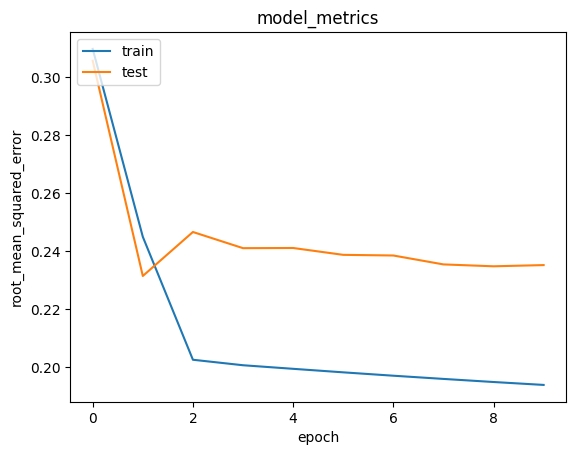

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Cek rekomendasi buku, dengan mengecek juga buku apa saja yang user telah lihat termasuk yang diberi rating nol/implisit dari book_dict. Diambil user secara acak untuk pengecekan.

In [ ]:
book_df = book_dict

user_id = rating_df.User_ID.sample(1).iloc[0]
book_seen = rating_df[rating_df.User_ID == user_id]

book_not_seen = book_df[~book_df['isbn'].isin(book_seen.ISBN.values)]['isbn']
book_not_seen = list(set(book_not_seen).intersection(set(book_isbn_encoded.keys())))

book_not_seen = [[book_isbn_encoded.get(x)] for x in book_not_seen]
user_book_array = np.hstack(
    ([[user_id]] * len(book_not_seen), book_not_seen)
)

mendapatkan rekomendasi 10 buku terbaik untuk user berdasarkan buku yang telah dirating user

In [ ]:
ratings = model.predict(user_book_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_isbn.get(book_not_seen[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_seen.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.isbn, ':', row.title)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.isbn, ':', row.title)

4615/4615 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Showing recommendations for users: 235105
Book with high ratings from user
--------------------------------
039330907X : The Thirteen-Gun Salute
0393312445 : The Wine-Dark Sea
0399148612 : Without Fail (Jack Reacher Novels (Hardcover))
0440418569 : The Amber Spyglass (His Dark Materials, Book 3)
047126153X : Jackie Robinson and the Integration of Baseball (Turning Points in History)
--------------------------------
Top 10 book recommendation
--------------------------------
0142001740 : The Secret Life of Bees
0345339681 : The Hobbit : The Enchanting Prelude to The Lord of the Rings
0345339703 : The Fellowship of the Ring (The Lord of the Rings, Part 1)
0345339738 : The Return of the King (The Lord of the Rings, Part 3)
0385484518 : Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson
0439064872 : Harry Potter and the Chamber of Secrets (Book 2)
0439139597 : Harry Potter and the Goblet of Fire (Book 4)
0439139600 : Harry P